In [148]:
import pandas as pd
import numpy as np
import glob
from pandas import Series, DataFrame
import os
from pathlib import Path
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import cvxpy as cp
from scipy.optimize import minimize

In [149]:
data = pd.read_csv('cerv_ca.csv')

In [185]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.642267,2.791883,1.399325,0.350189,4.057885,2.209657,0.448671,3.519082,0.293260,...,1.684784,1.644843,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.256419,0.000000,...,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Cleaning 

In [151]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,858.0,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
STDs: Number of diagnosis,858.0,0.087413,0.302545,0.0,0.0,0.0,0.0,3.0
Dx:Cancer,858.0,0.020979,0.143398,0.0,0.0,0.0,0.0,1.0
Dx:CIN,858.0,0.010490,0.101939,0.0,0.0,0.0,0.0,1.0
Dx:HPV,858.0,0.020979,0.143398,0.0,0.0,0.0,0.0,1.0
Dx,858.0,0.027972,0.164989,0.0,0.0,0.0,0.0,1.0
Hinselmann,858.0,0.040793,0.197925,0.0,0.0,0.0,0.0,1.0
Schiller,858.0,0.086247,0.280892,0.0,0.0,0.0,0.0,1.0
Citology,858.0,0.051282,0.220701,0.0,0.0,0.0,0.0,1.0
Biopsy,858.0,0.064103,0.245078,0.0,0.0,0.0,0.0,1.0


In [152]:
num_rows = data.shape[0]
num_cols = data.shape[1]
print("number of rows/entries:", num_rows )
print("number of columns", num_cols)

number of rows/entries: 858
number of columns 36


In [153]:
null_val_sums1 = data.isnull().sum()
duplicate1 = data[data.duplicated()].shape[0]
pd.DataFrame({"Column": null_val_sums1.index, "Number of Null Values": null_val_sums1.values,
              "Number of Duplicate Values":duplicate1, "Proportion": null_val_sums1.values / len(data), "Data Type": data.dtypes })

,Column,Number of Null Values,Number of Duplicate Values,Proportion,Data Type
Age,Age,0,23,0.0,int64
Number of sexual partners,Number of sexual partners,0,23,0.0,object
First sexual intercourse,First sexual intercourse,0,23,0.0,object
Num of pregnancies,Num of pregnancies,0,23,0.0,object
Smokes,Smokes,0,23,0.0,object
Smokes (years),Smokes (years),0,23,0.0,object
Smokes (packs/year),Smokes (packs/year),0,23,0.0,object
Hormonal Contraceptives,Hormonal Contraceptives,0,23,0.0,object
Hormonal Contraceptives (years),Hormonal Contraceptives (years),0,23,0.0,object
IUD,IUD,0,23,0.0,object


In [154]:
data = data.replace('?', np.nan)
data = data.astype(float)

In [155]:
data = data.fillna(data.mean())

In [156]:
#nan_values = data.isna()

#print(nan_values)

In [157]:
#nan_count = data.isna().sum()
#print(nan_count)

In [158]:
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,6.140845,5.816901,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.0,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,32.0,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,25.0,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
856,33.0,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA

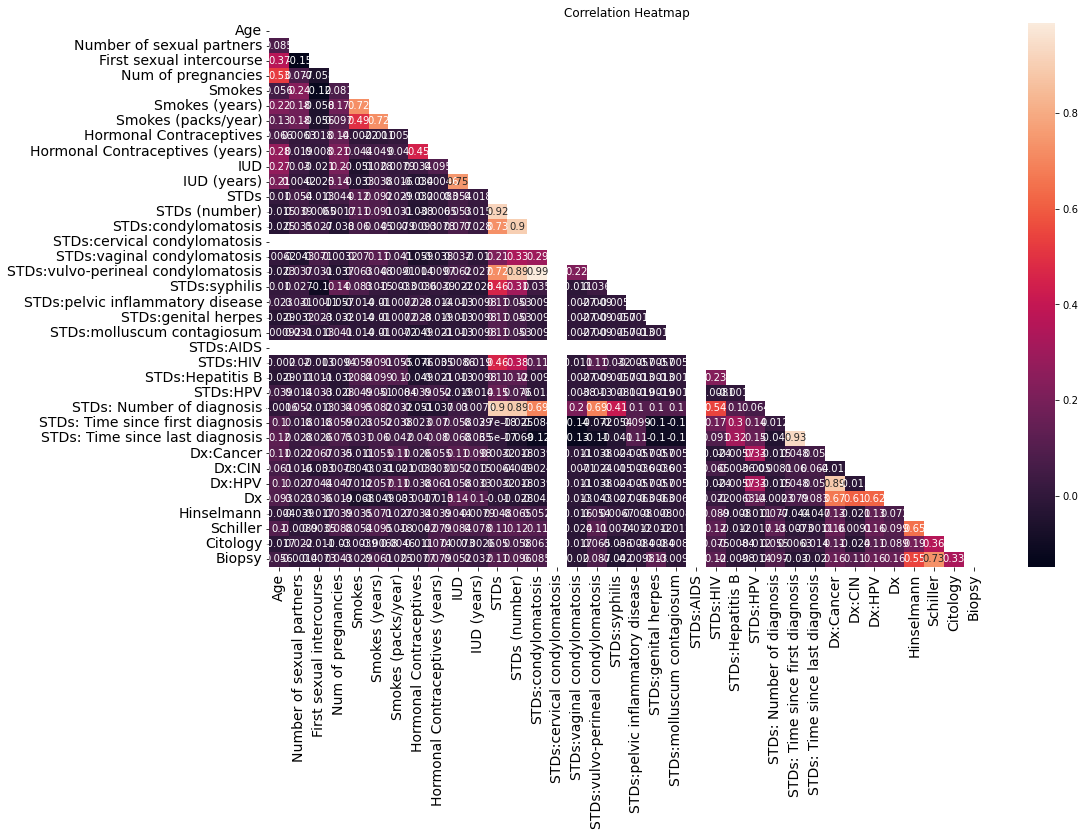

In [159]:
mask = np.zeros_like(data.corr()) # Create a maske for heatmap
triangle_indeces=np.triu_indices_from(mask) # arranging the mask variables in triagular shape
mask[triangle_indeces] =True
mask
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={"size":10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Correlation Heatmap")
plt.show()

In [160]:
def find_n_strong_correlations(df, threshold=0.8, n=5):
    corr_matrix = df.corr().abs() 
    np.fill_diagonal(corr_matrix.values, 0)
    flattened_corr = corr_matrix.unstack().sort_values(ascending=False)
    strong_correlations = []
    i = 0
    while len(strong_correlations) < n and i < len(flattened_corr):
        correlation = flattened_corr[i]
        if correlation >= threshold:
            strong_correlations.append(flattened_corr.index[i])
        i += 1
    
    return strong_correlations
strong_correlations = find_n_strong_correlations(data, threshold=0.8, n=10)
for pair in strong_correlations:
    print(pair)

('STDs:vulvo-perineal condylomatosis', 'STDs:condylomatosis')
('STDs:condylomatosis', 'STDs:vulvo-perineal condylomatosis')
('STDs: Time since first diagnosis', 'STDs: Time since last diagnosis')
('STDs: Time since last diagnosis', 'STDs: Time since first diagnosis')
('STDs', 'STDs (number)')
('STDs (number)', 'STDs')
('STDs: Number of diagnosis', 'STDs')
('STDs', 'STDs: Number of diagnosis')
('STDs (number)', 'STDs:condylomatosis')
('STDs:condylomatosis', 'STDs (number)')


In [161]:
cancer_corr = data.corr()['Dx:Cancer'].sort_values(ascending=False)
hpv_corr = data.corr()['Dx:HPV'].sort_values(ascending=False)

print("Correlation with Dx:Cancer:\n", cancer_corr)
print("\nCorrelation with Dx:HPV:\n", hpv_corr)

Correlation with Dx:Cancer:
 Dx:Cancer                             1.000000
Dx:HPV                                0.886508
Dx                                    0.665647
STDs:HPV                              0.329270
Biopsy                                0.160905
Schiller                              0.157812
Hinselmann                            0.134264
Citology                              0.113446
IUD                                   0.110541
Age                                   0.110340
Smokes (packs/year)                   0.108476
IUD (years)                           0.097947
First sexual intercourse              0.067283
Smokes (years)                        0.054674
Hormonal Contraceptives (years)       0.054627
STDs: Time since last diagnosis       0.050377
STDs: Time since first diagnosis      0.047618
Num of pregnancies                    0.035123
Hormonal Contraceptives               0.026407
Number of sexual partners             0.022309
STDs                           

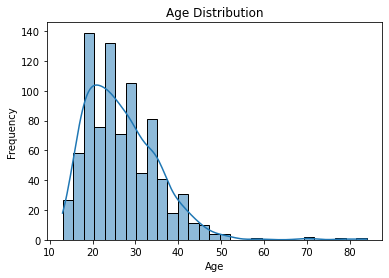

In [162]:
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

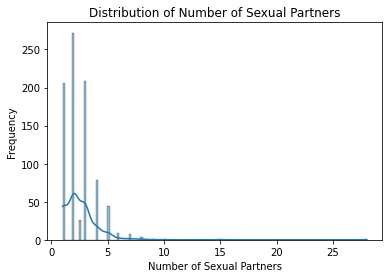

In [163]:
sns.histplot(data['Number of sexual partners'], kde=True)
plt.title('Distribution of Number of Sexual Partners')
plt.xlabel('Number of Sexual Partners')
plt.ylabel('Frequency')
plt.show()

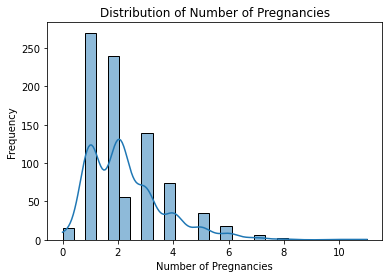

In [164]:
sns.histplot(data['Num of pregnancies'], kde=True)
plt.title('Distribution of Number of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
plt.show()

# Checking for Class Imbalance:

### For Dx:Cancer:

0.0    840
1.0     18
Name: Dx:Cancer, dtype: int64


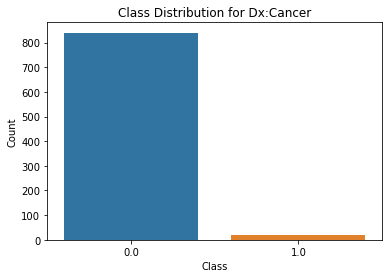

In [165]:
cancer_counts = data['Dx:Cancer'].value_counts()
print(cancer_counts)

sns.barplot(x=cancer_counts.index, y=cancer_counts.values)
plt.title('Class Distribution for Dx:Cancer')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### For Dx:HPV:

0.0    840
1.0     18
Name: Dx:HPV, dtype: int64


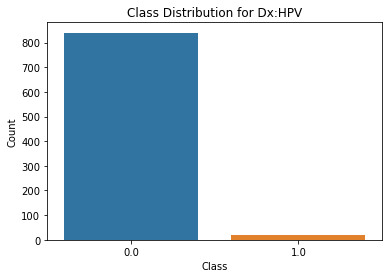

In [166]:
hpv_counts = data['Dx:HPV'].value_counts()
print(hpv_counts)

sns.barplot(x=hpv_counts.index, y=hpv_counts.values)
plt.title('Class Distribution for Dx:HPV')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [167]:
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,6.140845,5.816901,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.0,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,32.0,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,25.0,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
856,33.0,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Fixing the imbalance 

In [168]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Assuming your data is loaded in a DataFrame named 'data'
X = data.drop(['Dx:Cancer', 'Dx:HPV'], axis=1)  # Drop target columns to get features
y_cancer = data['Dx:Cancer']
y_hpv = data['Dx:HPV']

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=123)

# Correcting imbalance for Dx:Cancer
X_res_cancer, y_res_cancer = ros.fit_resample(X, y_cancer)

# Correcting imbalance for Dx:HPV
X_res_hpv, y_res_hpv = ros.fit_resample(X, y_hpv)

# Convert resampled data back to DataFrames
data_res_cancer = pd.DataFrame(X_res_cancer, columns=X.columns)
data_res_cancer['Dx:Cancer'] = y_res_cancer

data_res_hpv = pd.DataFrame(X_res_hpv, columns=X.columns)
data_res_hpv['Dx:HPV'] = y_res_hpv

# Display new class counts
print("Balanced counts for Dx:Cancer:")
print(data_res_cancer['Dx:Cancer'].value_counts())

print("\nBalanced counts for Dx:HPV:")
print(data_res_hpv['Dx:HPV'].value_counts())

Balanced counts for Dx:Cancer:
0.0    840
1.0    840
Name: Dx:Cancer, dtype: int64

Balanced counts for Dx:HPV:
0.0    840
1.0    840
Name: Dx:HPV, dtype: int64


# Feature Selection

Num Features: 5
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True False False  True  True False False False  True]
Feature Ranking: [20 22 25 19  2 24 12 18 11 14 15 10  9  4 30 21  6  8 27 16 26 29  5 28
  1  1 17 13  1  1 23  3  7  1]
Feature ranking:
1. feature 29 (0.319301)
2. feature 0 (0.130220)
3. feature 2 (0.072101)
4. feature 8 (0.057667)
5. feature 33 (0.049729)
6. feature 31 (0.042825)
7. feature 5 (0.036007)
8. feature 10 (0.035701)
9. feature 1 (0.034602)
10. feature 3 (0.029405)
11. feature 24 (0.028109)
12. feature 6 (0.022773)
13. feature 32 (0.019010)
14. feature 30 (0.018749)
15. feature 9 (0.017432)
16. feature 13 (0.010923)
17. feature 11 (0.010571)
18. feature 4 (0.009657)
19. feature 12 (0.009324)
20. feature 16 (0.008633)
21. feature 7 (0.007825)
22. feature 17 (0.005378)
23. feature 22 (0.005243)
24. feature 28 (0.004230)
25. feature 2

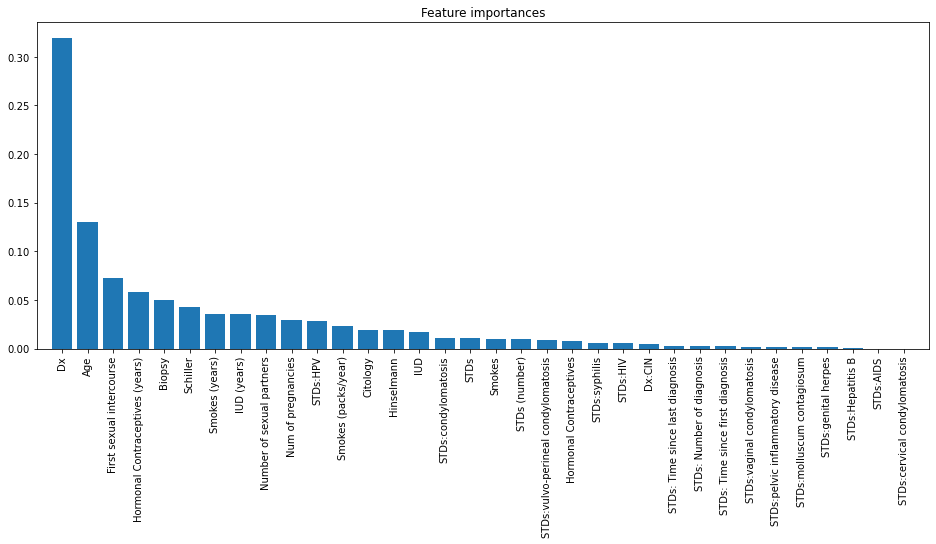

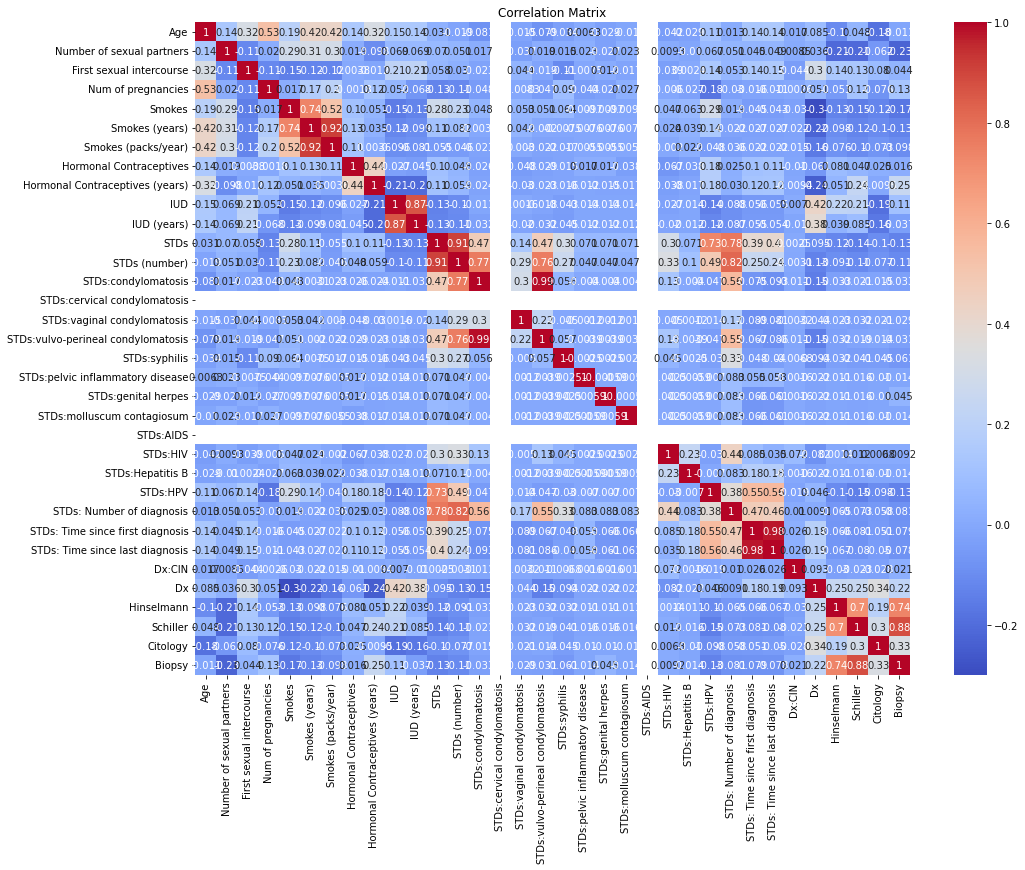

In [169]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is loaded in a DataFrame named 'data_res_cancer'
X = data_res_cancer.drop('Dx:Cancer', axis=1)
y = data_res_cancer['Dx:Cancer']

# 1. Recursive Feature Elimination (RFE)
# Using Logistic Regression as the model
model = LogisticRegression(max_iter=10000)
rfe = RFE(estimator=model, n_features_to_select=5)  # Corrected this line
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# 2. Feature Importance from tree-based algorithms (Random Forest in this case)
forest = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(16, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# 3. Correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Based on the correlation matrix, you can decide to drop features that are highly correlated
# For instance, if two features have a correlation > 0.9, you might consider dropping one of them.


Recursive Feature Elimination (RFE):

I employed the Recursive Feature Elimination (RFE) technique using Logistic Regression as the underlying model. The RFE algorithm aims to identify a subset of features that contribute significantly to the target variable. After applying RFE, I observed that the algorithm selected 5 features as the most relevant for predicting cancer diagnosis. The selected features were listed with a 'True' value in the 'Selected Features' output. Additionally, the 'Feature Ranking' showed the ranking of features based on their importance in the prediction task.

Feature Importance from Random Forest:

Next, I utilized a Random Forest classifier to determine the feature importances in predicting cancer diagnosis. The algorithm calculated the importance scores for each feature and ranked them in descending order. The top features contributing to the prediction were identified based on their associated importance scores. The 'Feature ranking' output displayed the ranking of features along with their importance scores. A bar plot was generated to visualize the relative importance of each feature.

Correlation Matrix:

To understand the correlations between different features, I computed the correlation matrix among the dataset's features. A heatmap visualization was created using the Seaborn library to provide a visual representation of the correlation values. The heatmap displayed the strength of correlations between pairs of features. Warmer colors indicated higher positive correlations, while cooler colors indicated negative correlations.

Recursive Feature Elimination (RFE) Results:

Num Features: 5: RFE has selected 5 features as the most important ones.
Selected Features: This is a boolean array indicating which features were selected (True) and which were not (False). From the array, it seems features at indices 24, 25, 28, 29, and 33 were selected.
Feature Ranking: This array provides a ranking for each feature. A rank of 1 indicates the feature is among the top selected features. Higher numbers indicate decreasing importance. For instance, the feature at index 24 is among the top 5, while the feature at index 20 is ranked 26th in importance.
Feature Importance from Tree-based Algorithm:

The list from "Feature ranking" is the output from a tree-based algorithm (like a Decision Tree, Random Forest, or Gradient Boosted Trees) that provides feature importance scores. The higher the score, the more important the feature.
Feature 29 is the most important with a score of 0.322106.
Feature 0 is the second most important with a score of 0.129537.
... and so on.
Feature 14 has a score of 0, which means it might not be contributing any information to the model's predictions and could potentially be dropped without affecting performance.

Comments:

- The RFE results and the tree-based feature importance might not always align perfectly. This is because they use different methodologies to determine feature importance. RFE uses a model (in your case, Logistic Regression) to recursively eliminate features and see how the model performs, while tree-based methods evaluate importance based on how often a feature is used to split the data.
- Features 29 and 0 are consistently ranked high in both methods, indicating they are likely very important.
- Features 14 and 21 have a score of 0 in the tree-based ranking, suggesting they might not be very informative. You might consider dropping them, especially if you're dealing with a high-dimensional dataset and are looking to reduce dimensionality.

# Feature Subset Creation
Based on the results of our feature selection, create a new dataset with only the selected features. For instance, if features at indices 24, 25, 28, 29, and 33 were deemed important, we'd create a new dataset with only these columns.

In [170]:
selected_features = X.columns[[24, 25, 28, 29, 33]]
X_selected_cancer = X_res_cancer[selected_features]
X_selected_hpv = X_res_hpv[selected_features]

# Data Splitting

In [171]:
from sklearn.model_selection import train_test_split

# Splitting data into train, test, and validation sets for Dx:Cancer
X_temp_cancer, X_test_cancer, y_temp_cancer, y_test_cancer = train_test_split(X_selected_cancer, y_res_cancer, test_size=0.2, random_state=123)
X_train_cancer, X_val_cancer, y_train_cancer, y_val_cancer = train_test_split(X_temp_cancer, y_temp_cancer, test_size=0.25, random_state=123)  # 0.25 x 0.8 = 0.2

# Splitting data into train, test, and validation sets for Dx:HPV
X_temp_hpv, X_test_hpv, y_temp_hpv, y_test_hpv = train_test_split(X_selected_hpv, y_res_hpv, test_size=0.2, random_state=123)
X_train_hpv, X_val_hpv, y_train_hpv, y_val_hpv = train_test_split(X_temp_hpv, y_temp_hpv, test_size=0.25, random_state=123)


# Model Training:

### Logistic Regression

In [172]:
model_cancer = LogisticRegression(max_iter=10000)
model_cancer.fit(X_train_cancer, y_train_cancer)

model_hpv = LogisticRegression(max_iter=10000)
model_hpv.fit(X_train_hpv, y_train_hpv)

LogisticRegression(max_iter=10000)

In [174]:
from sklearn.metrics import classification_report

y_pred_cancer = model_cancer.predict(X_test_cancer)
print("Classification Report for Dx:Cancer:")
print(classification_report(y_test_cancer, y_pred_cancer))

y_pred_hpv = model_hpv.predict(X_test_hpv)
print("\nClassification Report for Dx:HPV:")
print(classification_report(y_test_hpv, y_pred_hpv))
#print(model_hpv.summary())

Classification Report for Dx:Cancer:
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       164
         1.0       0.94      0.95      0.94       172

    accuracy                           0.94       336
   macro avg       0.94      0.94      0.94       336
weighted avg       0.94      0.94      0.94       336


Classification Report for Dx:HPV:
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92       164
         1.0       0.93      0.90      0.92       172

    accuracy                           0.92       336
   macro avg       0.92      0.92      0.92       336
weighted avg       0.92      0.92      0.92       336



### Evaluating Models

In [175]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# List of classifiers to evaluate
classifiers = [['SVC', SVC()],
               ['DecisionTreeClassifier', DecisionTreeClassifier()],
               ['KNeighborsClassifier', KNeighborsClassifier()],
               ['RandomForestClassifier', RandomForestClassifier()],
               ['MLPClassifier', MLPClassifier(max_iter=10000)],
               ['AdaBoostClassifier', AdaBoostClassifier()],
               ['GradientBoostingClassifier', GradientBoostingClassifier()]]

# DataFrame to store results
Acc = pd.DataFrame(index=None, columns=['model', 'Dx:Cancer_train', 'Dx:Cancer_test', 'Dx:Cancer_val', 'Dx:HPV_train', 'Dx:HPV_test', 'Dx:HPV_val'])

# Training and evaluating each classifier
for clf in classifiers:
    name = clf[0]
    model = clf[1]
    
    # For Dx:Cancer
    model.fit(X_train_cancer, y_train_cancer)
    score_cancer_train = model.score(X_train_cancer, y_train_cancer)
    score_cancer_test = model.score(X_test_cancer, y_test_cancer)
    score_cancer_val = model.score(X_val_cancer, y_val_cancer)
    
    # For Dx:HPV
    model.fit(X_train_hpv, y_train_hpv)
    score_hpv_train = model.score(X_train_hpv, y_train_hpv)
    score_hpv_test = model.score(X_test_hpv, y_test_hpv)
    score_hpv_val = model.score(X_val_hpv, y_val_hpv)
    
    Acc = pd.concat([Acc, pd.DataFrame([{'model': name, 
                                     'Dx:Cancer_train': score_cancer_train, 'Dx:Cancer_test': score_cancer_test, 'Dx:Cancer_val': score_cancer_val,
                                     'Dx:HPV_train': score_hpv_train, 'Dx:HPV_test': score_hpv_test, 'Dx:HPV_val': score_hpv_val}])], 
                ignore_index=True)

# Displaying the results
print(Acc)

                        model Dx:Cancer_train Dx:Cancer_test Dx:Cancer_val  \
0                         SVC        0.952381       0.949405      0.940476   
1      DecisionTreeClassifier        0.953373       0.952381      0.940476   
2        KNeighborsClassifier        0.949405       0.940476      0.934524   
3      RandomForestClassifier        0.953373       0.952381      0.940476   
4               MLPClassifier        0.952381       0.949405      0.940476   
5          AdaBoostClassifier        0.953373       0.952381      0.940476   
6  GradientBoostingClassifier        0.953373       0.952381      0.940476   

  Dx:HPV_train Dx:HPV_test Dx:HPV_val  
0     0.909722    0.925595   0.907738  
1     0.910714    0.928571   0.907738  
2     0.906746    0.916667   0.904762  
3     0.910714    0.928571   0.907738  
4      0.90873    0.922619   0.907738  
5     0.910714    0.928571   0.907738  
6     0.910714    0.928571   0.907738  


## Model Tuning

### Decision Tree Regressor parameters turning for Cancer

In [176]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

DTR = DecisionTreeRegressor()
param_grid = {
    "criterion": ["squared_error", "absolute_error"],
    "min_samples_split": [14, 15, 16, 17],
    "max_depth": [5, 6, 7],
    "min_samples_leaf": [4, 5, 6],
    "max_leaf_nodes": [29, 30, 31, 32],
}

grid_cv_DTR = GridSearchCV(DTR, param_grid, cv=5)

grid_cv_DTR.fit(X_train_cancer, y_train_cancer)
print("R-Squared::{}".format(grid_cv_DTR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_DTR.best_params_))

R-Squared::0.8027276275698829
Best Hyperparameters::
{'criterion': 'squared_error', 'max_depth': 5, 'max_leaf_nodes': 29, 'min_samples_leaf': 4, 'min_samples_split': 14}


In [177]:
DTR = DecisionTreeRegressor(criterion= 'squared_error', max_depth= 5, max_leaf_nodes= 29, min_samples_leaf= 4, min_samples_split= 14)

DTR.fit(X_train_cancer, y_train_cancer)
print("R-Squared on Y test dataset={}".format(DTR.score(X_test_cancer, y_test_cancer)))

R-Squared on Y test dataset=0.8331543170693211


### Decision Tree Regressor parameters turning for HPV

In [178]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

DTR = DecisionTreeRegressor()
param_grid = {
    "criterion": ["squared_error", "absolute_error"],
    "min_samples_split": [14, 15, 16, 17],
    "max_depth": [5, 6, 7],
    "min_samples_leaf": [4, 5, 6],
    "max_leaf_nodes": [29, 30, 31, 32],
}

grid_cv_DTR = GridSearchCV(DTR, param_grid, cv=5)

grid_cv_DTR.fit(X_train_hpv, y_train_hpv)
print("R-Squared::{}".format(grid_cv_DTR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_DTR.best_params_))

R-Squared::0.6696547648627164
Best Hyperparameters::
{'criterion': 'squared_error', 'max_depth': 5, 'max_leaf_nodes': 29, 'min_samples_leaf': 4, 'min_samples_split': 14}


In [179]:
DTR = DecisionTreeRegressor(criterion= 'squared_error', max_depth= 5, max_leaf_nodes= 29, min_samples_leaf= 4, min_samples_split= 14)

DTR.fit(X_train_hpv, y_train_hpv)
print("R-Squared on Y test dataset={}".format(DTR.score(X_test_hpv, y_test_hpv)))

R-Squared on Y test dataset=0.7529039595465055


### Random Forests parameters turning for Cancer

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [{'n_estimators': [350, 400, 450], 'max_features': [1, 2], 'max_depth': [85, 90, 95]}]

RFR = RandomForestRegressor(n_jobs=-1)
grid_search_RFR = GridSearchCV(RFR, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_RFR.fit(X_train_cancer, y_train_cancer)

print("R-Squared::{}".format(grid_search_RFR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_search_RFR.best_params_))

R-Squared::-0.04265857688117779
Best Hyperparameters::
{'max_depth': 95, 'max_features': 1, 'n_estimators': 400}


In [181]:
RFR = RandomForestRegressor(n_estimators = 450, max_features = 1, max_depth= 85, bootstrap= True)

RFR.fit(X_train_cancer, y_train_cancer)
print("R-Squared on Y test dataset={}".format(RFR.score(X_test_cancer, y_test_cancer)))

R-Squared on Y test dataset=0.8386609663303208


### Random Forests parameters turning for HPV

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [{'n_estimators': [350, 400, 450], 'max_features': [1, 2], 'max_depth': [85, 90, 95]}]

RFR = RandomForestRegressor(n_jobs=-1)
grid_search_RFR = GridSearchCV(RFR, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_RFR.fit(X_train_hpv, y_train_hpv)

print("R-Squared::{}".format(grid_search_RFR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_search_RFR.best_params_))

R-Squared::-0.07581229545414579
Best Hyperparameters::
{'max_depth': 90, 'max_features': 1, 'n_estimators': 400}


In [183]:
RFR = RandomForestRegressor(n_estimators = 350, max_features = 1, max_depth= 95, bootstrap= True)

RFR.fit(X_train_hpv, y_train_hpv)
print("R-Squared on Y test dataset={}".format(RFR.score(X_test_hpv, y_test_hpv)))

R-Squared on Y test dataset=0.7585408987446902


### Gradient Boosting Regression parameters turning for Cancer

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()

param_grid = {
    "learning_rate": [0.01, 0.02, 0.1],
    "n_estimators": [150, 200, 250],
    "max_depth": [4, 5, 6],
    "min_samples_split": [2, 3, 4],  # Adjusted min_samples_split
    "min_samples_leaf": [2, 3],
    "subsample": [0.5, 0.8, 1.0],    # Adjusted subsample values
    "criterion": ["squared_error", "absolute_error"]  # Adjusted criterion
}

grid_search_GBR = GridSearchCV(GBR, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search_GBR.fit(X_train_cancer, y_train_cancer)

print("R-Squared::{}".format(grid_search_GBR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_search_GBR.best_params_))

R-Squared::-0.04272242689805851
Best Hyperparameters::
{'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200, 'subsample': 0.5}


C:\Users\phiez\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4860 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4860 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\phiez\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\phiez\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 533, in fit
    raise ValueError(
ValueError: criterion='absolute_error' is not supported. Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.

  war

### Gradient Boosting Regression parameters turning for HPV

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()

param_grid = {
    "learning_rate": [0.01, 0.02, 0.1],
    "n_estimators": [150, 200, 250],
    "max_depth": [4, 5, 6],
    "min_samples_split": [2, 3, 4],  # Adjusted min_samples_split
    "min_samples_leaf": [2, 3],
    "subsample": [0.5, 0.8, 1.0],    # Adjusted subsample values
    "criterion": ["squared_error", "absolute_error"]  # Adjusted criterion
}

grid_search_GBR = GridSearchCV(GBR, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search_GBR.fit(X_train_hpv, y_train_hpv)

print("R-Squared::{}".format(grid_search_GBR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_search_GBR.best_params_))

R-Squared::-0.07689832069832633
Best Hyperparameters::
{'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150, 'subsample': 0.5}


C:\Users\phiez\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4860 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4860 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\phiez\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\phiez\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 533, in fit
    raise ValueError(
ValueError: criterion='absolute_error' is not supported. Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.

  war